# Datensatz 1 (Schraubenköpfe)

Um mit einfachen Modellen starten zu können sollte auch die Lernaufgabe zunächst so einfach wie möglich gestaltet sein. Es wäre sicher nicht die richtige Vorgehensweise, direkt mit der höchsten Komplexität zu starten. So sind wir in der Lage den dahinter stehenden Mechanismus besser zu verstehen und nachvollziehen zu können.

Um schnell erste eigene Modelle zu entwickeln lassen wir uns vom MNIST Datensatz inspirieren. Dieser ist sehr bekannt und wurde schon sehr häufig mit den verschiedensten Modellen (SVM,CNN,Logistic Regression,..) bearbeitet. Der Vorteil besteht darin, dass schon sehr viele Informationen und fertige Modelle existieren.

Die Idee ist nun, fertige Modelle des MNIST Datensatzes zu nehmen und diese mit einem Eigenen Datensatz zu trainieren. So kann man schnell Erfahrungen sammeln und durch den Programmcode die Vorgänge nachvollziehen.

Um einfach zu beginnen konzentrieren wir uns zunächst auf eine Eigenschaft der Schraube, dem Kopf bzw. der Antriebsart (Kreuzschlitz, Torx, Sechskant, usw.) und nehmen dafür einfache Grafiken die sehr gut zu unterscheiden sind damit sich das Modell nur auf die Form konzentrieren kann und nicht von Lichteinflüssen wie in realen Umgebungen beeinflusst wird. Die Auswahl viel auf folgende gängigen Antriebsarten:
- Innensechskant (Inbus)
- Philips (Kreuzschlitz)
- Pozidriv (Kreuzschlitz)
- Sechskant
- Torx

Diese sind, zumindest für das menschliche Auge, gut zu unterscheiden und sollten von einem Modell welches mit den MNIST-Daten funktioniert auch gut erkannt werden können.

Es gibt jedoch auch schon gewisse Schwierigkeiten:
- Innensechskant und Torx ähneln sich,schwarzer Ring auf weißem Hintergrund, Innenkontur auch ähnlich
- Philips-Kreuz und Pozidriv-Kreuz sind nur durch die Einkerbungen in der Pozidriv zu unterscheiden
- Das Sechskant-Profil ähnelt keinem Profil und unterscheidet sich stark von allen anderen, schwarze Fläche mit sechseckiger Außenkontur

Es ist zu erwarten, dass die Modelle mit dem Sechskant weniger Schwierigkeiten haben werden als mit den anderen Profilen.

So sollte dieser Datensatz einfach genug für den Anfang sein aber bringt auch schon die ersten schwierigkeiten mit sich, welche die Performance der verschiedenen Modelle auf die Probe stellen.

Wir haben uns nun für 5 Klassen entschieden die unser Datensatz haben soll (Innensechskant, Philips,Pozidriv,Sechskant,Torx). Zu jeder Klasse existiert ein Bild. Aus diesen 5 Bildern wollen wir nun einen Datensatz mit mehreren tausend Bildern generieren.

Da ein Datensatz, bestehend aus identischen Bildern keinen Sinn ergibt, da wir ja ein Modell haben möchten, welches in der Lage ist neue aber ähnliche Bilder zu erkennen müssen wir es auch entsprechend trainieren, d.h. mit vielen verschiedenen aber ähnlichen Bildern zu jeder Klasse füttern um das Modell für den Einsatz mit realen Bildern zu trainieren.

Image Data Generator:
- in Tensorflow/Keras enthalten
- ist in der Lage vorhandene Bilder zu transformieren (shift, rotate, roll,usw.) um den Trainingsdatensatz künstlich zu vergrößern
- Man kann aber auch Bilder damit Speichern und somit viele verschiedene Bilder generieren

Schauen wir uns einmal im Code an wie wir einen kompletten Datensatz aus unseren 5 Bildern erstellen können:

## Bilder anzeigen

Der Datensatz 1 wird aus nur 5 Bildern erzeugt. Die Bilder stellen die Schraubenköpfe Symbolartig dar. Desweiteren sind die Bilder nur 28 x 28 Pixel groß.

In [133]:
# importieren der Matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [134]:
pozidriv = mpimg.imread('0_Schraubenkopfbilder_28x28/pozidriv/pozidriv 28x28_gray.jpg')
philips = mpimg.imread('0_Schraubenkopfbilder_28x28/philips/philips 28x28_gray.jpg')
innensechskant = mpimg.imread('0_Schraubenkopfbilder_28x28/innensechskant/innensechskant 28x28_gray.jpg')
sechskant = mpimg.imread('0_Schraubenkopfbilder_28x28/sechskant/sechskant 28x28_gray.jpg')
torx = mpimg.imread('0_Schraubenkopfbilder_28x28/torx/torx 28x28_gray.jpg')

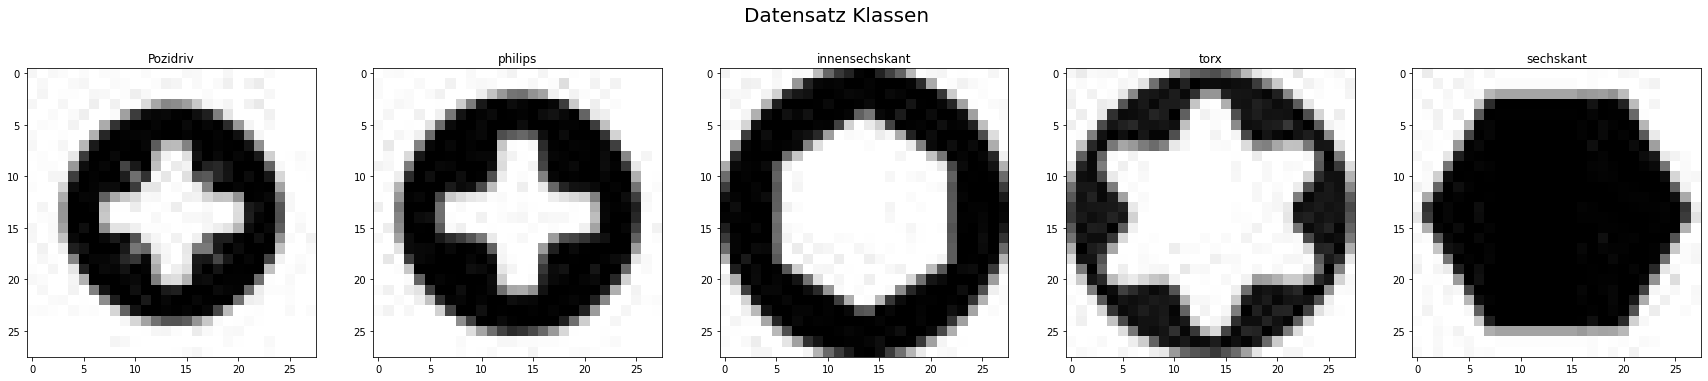

In [135]:
plt.figure(figsize=(30, 6))
plt.subplot(1, 5, 1)
plt.title('Pozidriv')
plt.imshow(pozidriv, cmap='gray')

plt.subplot(1, 5, 2)
plt.title('philips')
plt.imshow(philips, cmap='gray')

plt.subplot(1, 5, 3)
plt.title('innensechskant')
plt.imshow(innensechskant, cmap='gray')

plt.subplot(1, 5, 4)
plt.title('torx')
plt.imshow(torx, cmap='gray')

plt.subplot(1, 5, 5)
plt.title('sechskant')
plt.imshow(sechskant, cmap='gray')

plt.suptitle('Datensatz Klassen', fontsize=20)
#plt.subplots_adjust(left=0.2, wspace=0.4, top=0.8)
plt.show()

Der Datensatz dient zum Trainieren und Testen der künstlichen neuronalen Netze. Es gibt verschiedene Wege einen Datensatz von Schraubenbildern zu erzeugen:
 - virtuelle 3D Objekte mit Hilfe von CAD darstellen und daraus Bilder mit unterschiedlichen Ausrichtungen erzeugen
 - Schraubenbilder aus Herstellerkatalogen oder dem Internet extrahieren
 - Eigene Bilder mit einer Kamera anfertigen

In dieser Arbeit werden die letzteren beiden Varianten vorgestellt. Zunächst wird gezeigt, wie aus wenigen externen Bidern ein Datensatz künstlich erzeugt werden kann. Dieser künstlich erzeugte Daten besteht aus sehr wenigen Ursprungsbildern, die künstlich transformiert werden um somit weitere Bilder zu generieren. Die Transformation wird im Abschnitt "Datensatz aus wenigen Bildern" noch näher beschrieben.

## Datensatz aus wenigen Bildern

Dieser Erste Datensatz dient dazu, zu zeigen wie vorhandene Bilder künstlich leichten Veränderungen unterzogen werden können um somit dem Netz einen umfangreicheren Trainingssatz bereit zu stellen. Desweiteren werden in diesem künstlichen Datensatz lediglich verschiedene Schraubenkopfformen mit gleicher Ausrichtung verwendet. Die Folge ist ein Datensatz, der einfach genug ist um Regressionsmodelle zu Einstieg zu verwenden.

Als Einführung in das Thema Bilderkennung mit CNN's, wird eine einfache Bilderkennung mit Hilfe der Logistischen Regression erstellt. Die Log. Regr. ist sehr viel weniger leistungsfähig als ein CNN, aus diesem Grund wird ein einfacher Datensatz aus Symbol-Bildern von 5 Schraubenarten erstellt.

Aus diesen Bildern wird nun ein Datensatz erzeugt. Die Bilder werden mit Hilfe des "Image Data Generators" transformiert, d.h durch Rotation, Zoom, Verschiebung werden neue Varianten der Bilder generiert.

## Image Data Generator (Konfiguration)

**1. Random Rotations**  
Image rotation is one of the widely used augmentation techniques and allows the model to become invariant to the orientation of the object.  
ImageDataGenerator class allows you to randomly rotate images through any degree between 0 and 360 by providing an integer value in the rotation_range argument.  
When the image is rotated, some pixels will move outside the image and leave an empty area that needs to be filled in.  
You can fill this in different ways like a constant value or nearest pixel values, etc.  
This is specified in the fill_mode argument and the default value is “nearest” which simply replaces the empty area with the nearest pixel values.

**2. Random Shifts**
It may happen that the object may not always be in the center of the image.  
To overcome this problem we can shift the pixels of the image either horizontally or vertically; this is done by adding a certain constant value to all the pixels.
ImageDataGenerator class has the argument height_shift_range for a vertical shift of image and width_shift_range for a horizontal shift of image.  
If the value is a float number, that would indicate the percentage of width or height of the image to shift.  
Otherwise, if it is an integer value then simply the width or height are shifted by those many pixel values.

**3. Random Flips**
Flipping images is also a great augmentation technique and it makes sense to use it with a lot of different objects.
ImageDataGenerator class has parameters horizontal_flip and vertical_flip  for flipping along the vertical or the horizontal axis.  
However, this technique should be according to the object in the image.  
For example, vertical flipping of a car would not be a sensible thing compared to doing it for a symmetrical object like football or something else. Having said that,  
I am going to flip my image in both ways just to demonstrate the effect of the augmentation.

**4. Random Brightness**
It randomly changes the brightness of the image. It is also a very useful augmentation technique because most of the time our object will not be under perfect lighting condition.  
So, it becomes imperative to train our model on images under different lighting conditions.
Brightness can be controlled in the ImageDataGenrator class through the brightness_range argument.  
It accepts a list of two float values and picks a brightness shift value from that range.  
~~Values less than 1.0 darkens the image, whereas values above 1.0 brighten the image.~~

**5. Random Zoom**
The zoom augmentation either randomly zooms in on the image or zooms out of the image.  
ImageDataGenerator class takes in a float value for zooming in the zoom_range argument.  
You could provide a list with two values specifying the lower and the upper limit.  
Else, if you specify a float value, then zoom will be done in the range [1-zoom_range,1+zoom_range].  
Any value smaller than 1 will zoom in on the image. Whereas any value greater than 1 will zoom out on the image.

**Random Zoom Augmentation**
The zoom augmentation method is used to zooming the image. This method randomly zooms the image either by zooming in or it adds some pixels around the image to enlarge the image. This method uses the zoom_range argument of the ImageDataGenerator class. We can specify the percentage value of the zooms either in a float, range in the form of an array, or python tuple.

If we specify the value of the zoom-in using float value then it will be [1-floatValue, 1+floatValue]. For example, if we specify the float value as 0.5, then it actually becomes like [0.5, 1.5] as we subtract 0.5 from 1 in the first range and add 0.5 to 1 in the second range which actually means zoom-in 50% and zoom-out 150%.

Zoom also has some boundary values as we have in the brightness parameter case. Value of the zoom less than 1.0 magnifies the image and more than 1.0 will zoom out the image.

For example: [0.6,0.6], in this range the zoom will enlarge the image which means the object of the image will become 60% larger or come closer and if the value is greater than 1.0 e.g. [1.6, 1.6] will zoom the image out 60%. But be cautious that [1.0,1.0] will have no effect as this is the boundary.

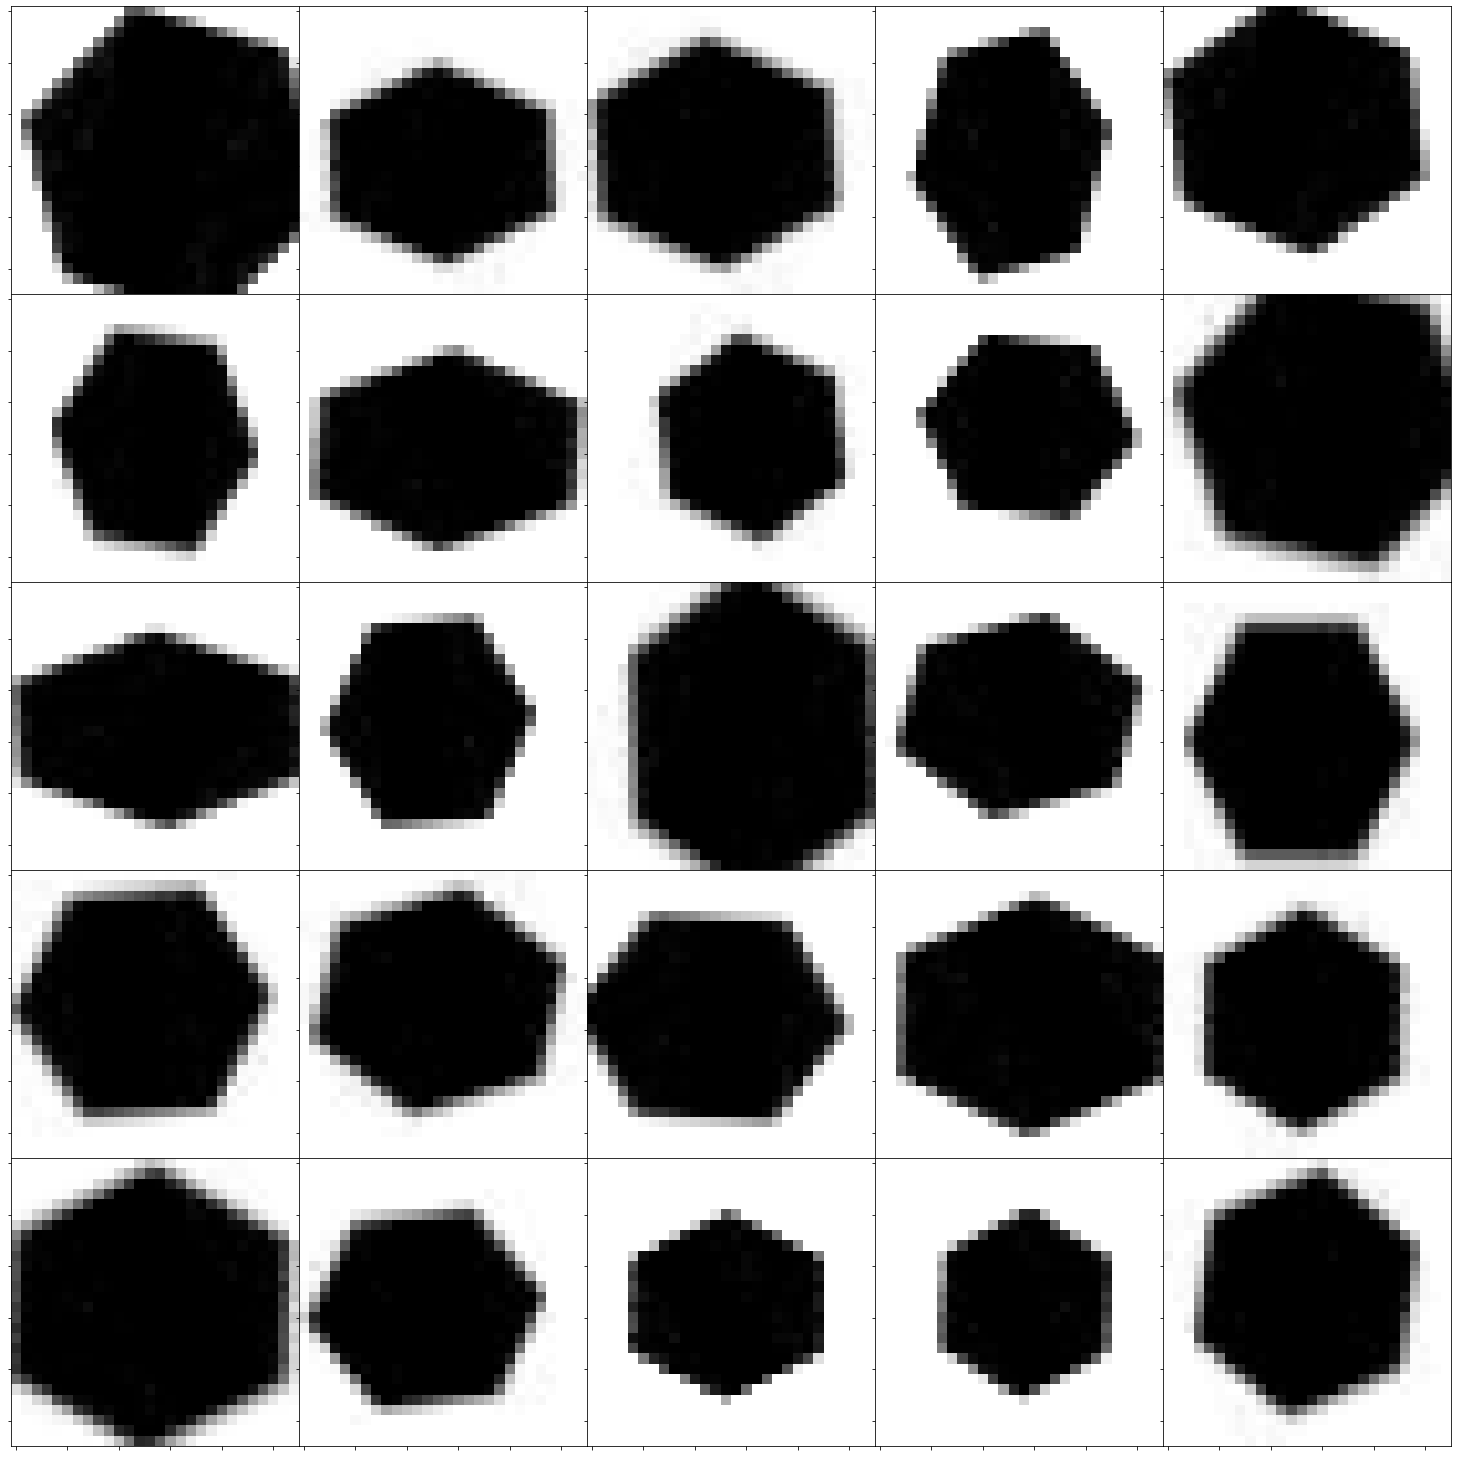

In [139]:
from matplotlib import gridspec
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

img = sechskant.reshape(1,28,28,1)





# brightness_range=(0.2, 0.8): 0 = min, 1 = max 
# fill_mode='constant',cval=255,
# width_shift_range=2.0,
# height_shift_range=2.0,
# shear_range=0.0,
# zoom_range=0.20,

# ImageDataGenerator konfigurieren
datagen = ImageDataGenerator(rotation_range=30,
                             brightness_range=[0.1,1.9],
                             fill_mode='constant',cval=255,
                             width_shift_range=2.0,
                             height_shift_range=2.0,
                             shear_range=0.0,
                             zoom_range=[0.8,1.4],
                             channel_shift_range=0.0,
                             horizontal_flip=True,
                             vertical_flip=True,
                             validation_split=0.0,)


# von: https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/
# iterator
aug_iter = datagen.flow(img, batch_size=1)



nrow = 5
ncol = 5


#fig = plt.figure(figsize=(ncol+1, nrow+1)) 
fig = plt.figure(figsize=(24, 24)) 
gs = gridspec.GridSpec(nrow, ncol,
         wspace=0.0, hspace=0.0, 
         top=1.-0.5/(nrow+1), bottom=0.5/(nrow+1), 
         left=0.5/(ncol+1), right=1-0.5/(ncol+1)) 
im = 0
for i in range(nrow):
    for j in range(ncol):
        # convert to unsigned integers
        image = next(aug_iter)[0].astype('uint8')
        ax= plt.subplot(gs[i,j])
        ax.imshow(image,cmap='gray')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        im +=1

plt.show()

## Image Data Generator (Speichern)

Mit dem konfigurierten Generator die Bilder klassenweise erzeugen und speichern.

In [140]:
# Bild laden
image = sechskant.reshape(1,28,28,1)



# iterate

itr = datagen.flow(
    image,
    shuffle=True,
    save_to_dir='dataset_28x28/sechskant',
    save_prefix='sechskant',
    save_format='png',
    
)

# Samples in Ordner schreiben
for i in range(0,2001):
    itr.next()

Die Bilder der Klassen können unterschiedlich stark transformiert werden.

## Bilder Datensatz mit Labels (manuell)

Die künstlich erzeugten Bilder wurden nach Klassen sortiert.  
Nun wird aus dieser Ordner Struktur ein Datensatz mit Labels erzeugt (image_dataset).
Die folgende Ordnerstruktur liegt vor:

main_directory/  
...category_a/  
......a_image_1.jpg  
......a_image_2.jpg  
...category_b/  
......b_image_1.jpg  
......b_image_2.jpg  

````
# training_data anlegen
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
image_dataset = []

# Bildgröße
IMG_SIZE=28

# rel. Pfad Datensatz Hauptordner
DATADIR = 'dataset_28x28'

# Klassen / Unterordner
CATEGORIES = ['innensechskant', 'philips', 'pozidriv', 'sechskant', 'torx']


# Bilder und Kategorien in ein ... speichern:

def create_image_dataset():
    for category in CATEGORIES:  # jede Klasse

        path = os.path.join(DATADIR,category)  # create path to 
        class_num = CATEGORIES.index(category)  # get the classification ( 0= 1=

        for img in tqdm(os.listdir(path)):  # iterate over each image per Category
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                image_dataset.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            except OSError as e:
                print("OSErrroBad img most likely", e, os.path.join(path,img))
            except Exception as e:
                print("general exception", e, os.path.join(path,img))

create_image_dataset()

print(len(image_dataset))
````

X = []
y = []

for features,label in image_dataset:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

## Datensatz mischen

from sklearn.utils import shuffle
import numpy as np


X, y = shuffle(X, y)

## Datensatz Vorschau

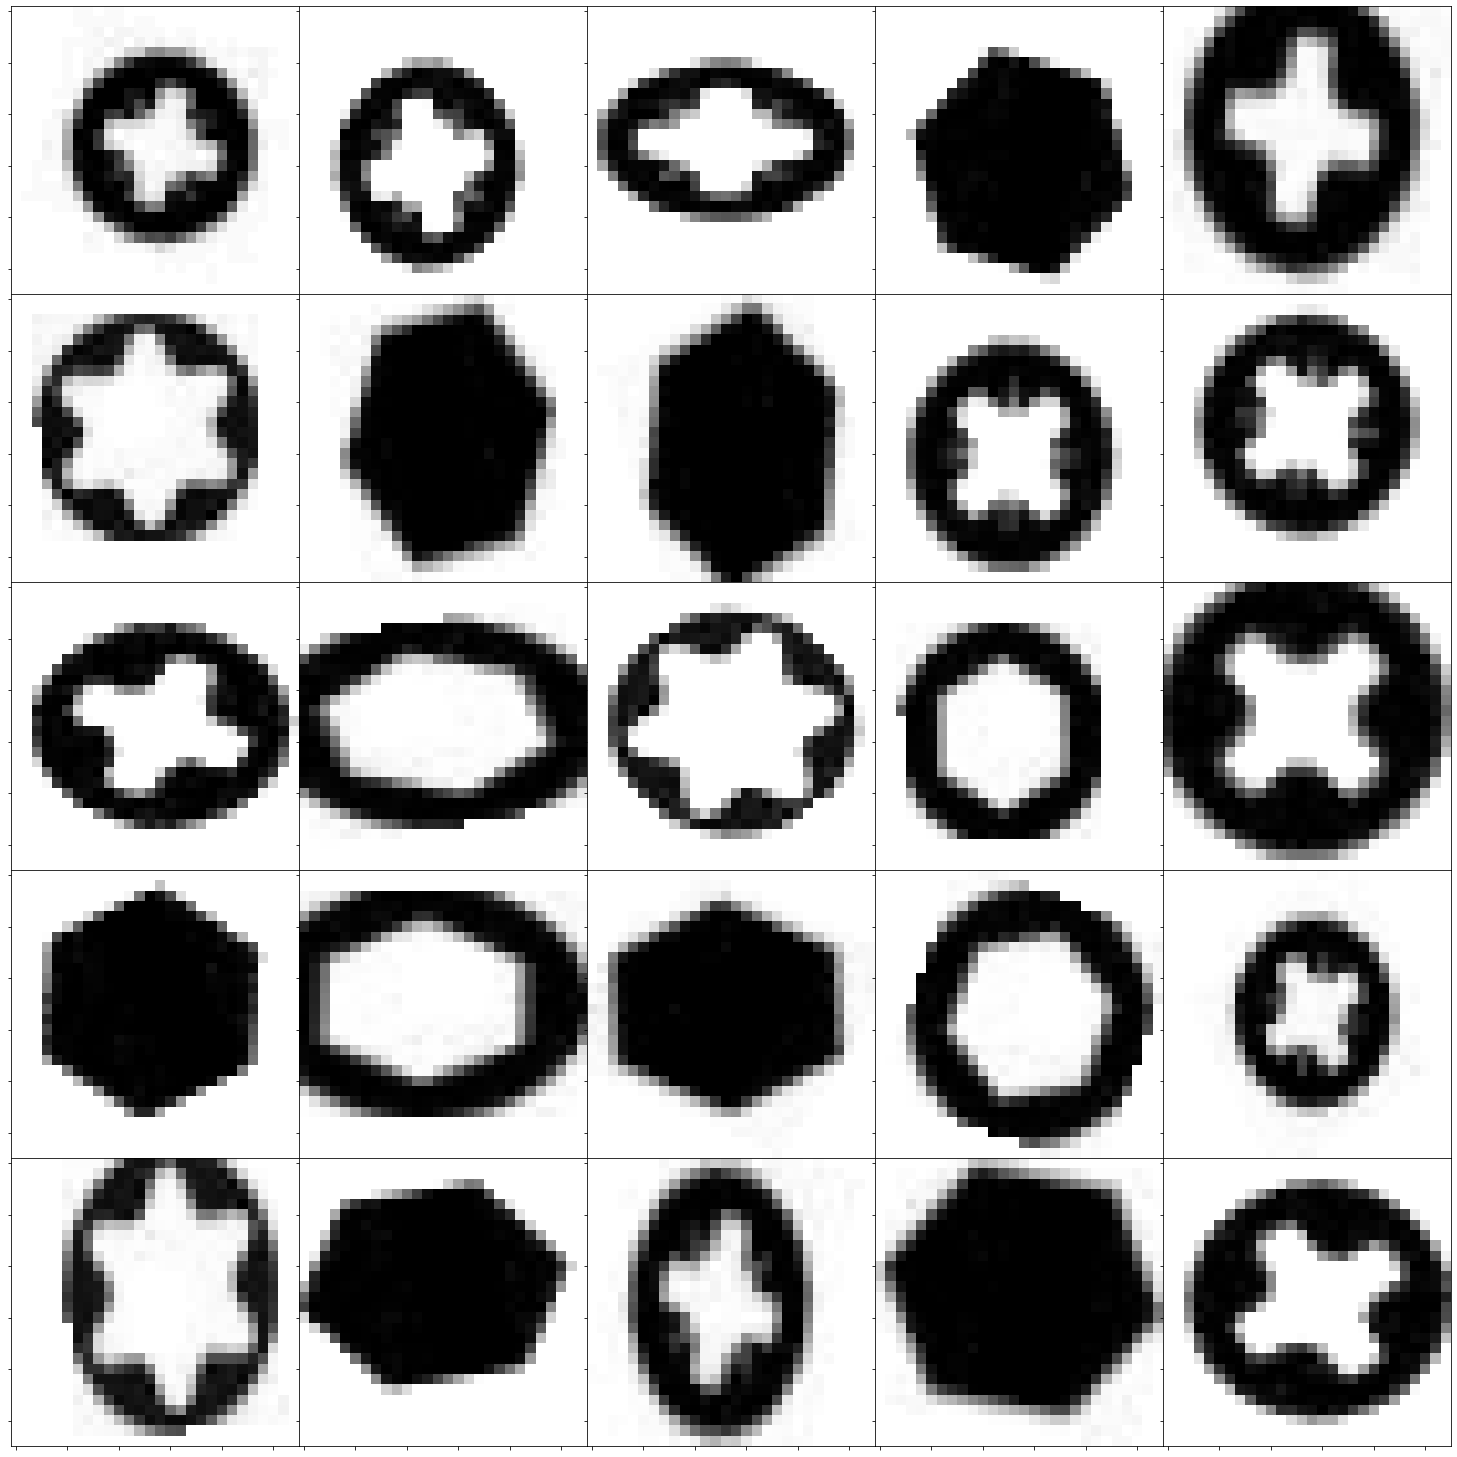

In [144]:
nrow = 5
ncol = 5


#fig = plt.figure(figsize=(ncol+1, nrow+1)) 
fig = plt.figure(figsize=(24, 24))
'''
gs = gridspec.GridSpec(nrow, ncol,
         wspace=0.0, hspace=0.0, 
         top=1.-0.5/(nrow+1), bottom=0.5/(nrow+1), 
         left=0.5/(ncol+1), right=1-0.5/(ncol+1))
'''
im = 0
for i in range(nrow):
    for j in range(ncol):
        # convert to unsigned integers
        
        ax= plt.subplot(gs[i,j])
        ax.imshow(X[im,:,:,0].astype('uint8'),cmap='gray')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        im +=1

plt.show()

In [145]:
X.shape

(9174, 28, 28, 1)

## Datensatz aufteilen

Die Bilder **X** und die entsprechenden Labels **y** werden nun noch aufgeteilt.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Datensatz untersuchen

Wie sieht der Datensatz aus? wurden die Bilder gemischt oder sind sie immer noch nach Klassen sortiert?

In [147]:
print(X_train.shape)
print(X_test.shape)
print(len(y_train))
print(len(y_test))

(6421, 28, 28, 1)
(2753, 28, 28, 1)
6421
2753


1


<function matplotlib.pyplot.show(close=None, block=None)>

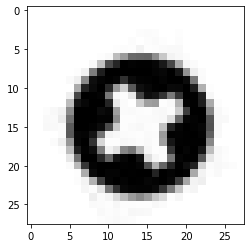

In [148]:
# 0 = innensechskant
# 1 = philips
# 2 = pozidriv
# 3 = sechskant
# 4 = torx

i=2348
print(y_test[i])
plt.imshow(X_test[i],cmap='gray',vmin=0,vmax=255)
plt.show

## Datensatz exportieren

````
from numpy import save, load

# save to npy file
save('Dataset_28x28/X_train.npy', X_train)
save('Dataset_28x28/y_train.npy', y_train)
save('Dataset_28x28/X_test.npy', X_test)
save('Dataset_28x28/y_test.npy', y_test)

````